In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import numpy as np
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate

import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [10]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

In [11]:
df_meta = pd.read_csv('/Users/mbornhol/git/neural-profiling/pre-trained/data-prep/02_index_preperation/repurposing_info_external_moa_map_resolved.tsv', sep='\t')
df_meta = df_meta[['broad_sample', 'moa']]
df_meta.rename(columns = {'broad_sample' : 'Metadata_broad_sample', 'moa' : 'Metadata_moa'}, inplace=True)

In [12]:
# select subsections
index = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/812_index.csv')

# Effect of learning rate

Comparing:

- 917 Cosine.005 / index 817 / 20E / batch size 256
- 927 / Cosine.02 / index 817 / 20E / batch size 256
- 928 / Cosine.01 / index 817 / 20E / batch size 256
- 929 / Cosine.002 / index 817 / 20E / batch size 256

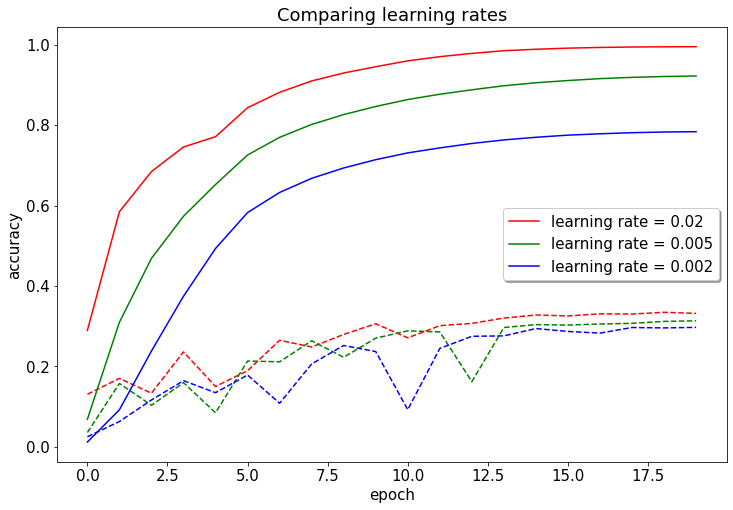

In [16]:
eval.plotting.accuracy_noloss(title = "Comparing learning rates", index1="927", label_1="learning rate = 0.02", index2="917", label_2="learning rate = 0.005", index3="929", label_3="learning rate = 0.002")

In [ ]:
acc917 = pd.read_csv('accuracy/917.csv')
acc927 = pd.read_csv('accuracy/927.csv')
# acc928 = pd.read_csv('accuracy/928.csv')
acc929 = pd.read_csv('accuracy/929.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("influence of LR")
plt.xlabel('epochs')
ax.plot(acc927['acc'], 'g', linestyle='dashdot',label = 'LR = .02')
ax.plot(acc927['val_acc'], 'g',label = 'val_acc')
ax.plot(acc917['acc'], 'r',label = 'LR = .005' )
ax.plot(acc917['val_acc'], 'r',linestyle='dashed', label = 'val_acc')
ax.plot(acc929['acc'], 'y', label = 'LR = .002' )
ax.plot(acc929['val_acc'], 'y',linestyle='dashed', label = 'val_acc')

ax.legend(loc = 'right', shadow=True)
ax.set_ylabel('accuracy')
plt.show()

In [21]:
acc927.iloc[-1]

loss       0.2307
acc        0.9952
val_acc    0.3319
Name: 19, dtype: float64

In [22]:
acc917.iloc[-1]

loss       0.4986
acc        0.9223
val_acc    0.3134
Name: 19, dtype: float64

In [23]:
acc929.iloc[-1]

loss       0.9505
acc        0.7838
val_acc    0.2972
Name: 19, dtype: float64

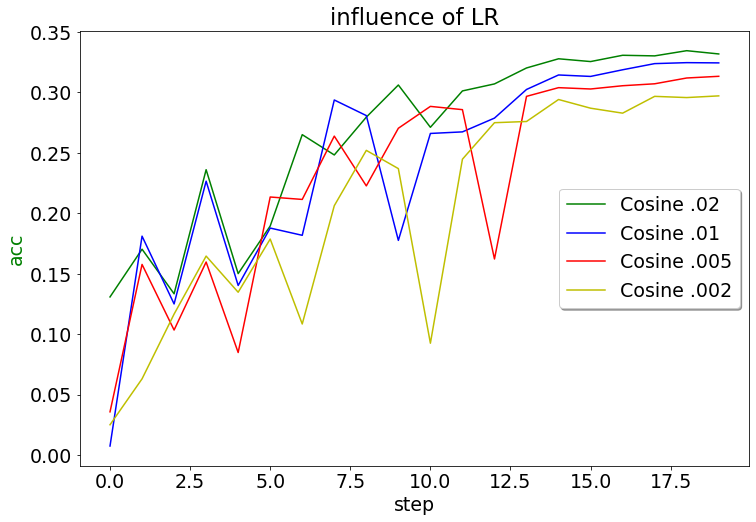

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title("influence of LR")
plt.xlabel('step')

ax.plot(acc927['val_acc'], 'g-', label = 'Cosine .02')
ax.plot(acc928['val_acc'], 'b-', label = 'Cosine .01')
ax.plot(acc917['val_acc'], 'r-', label = 'Cosine .005')
ax.plot(acc929['val_acc'], 'y-', label = 'Cosine .002')

ax.legend(loc = 'right', shadow=True)
ax.set_ylabel('acc', color='g')

plt.show()

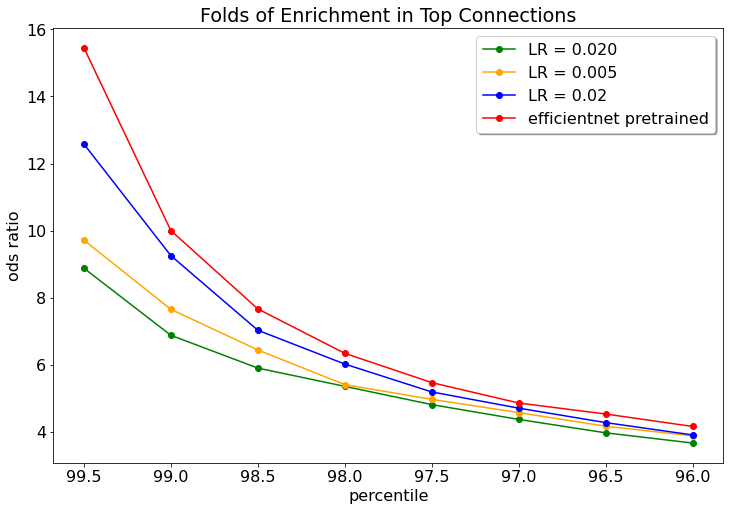

In [7]:
res1 = pd.read_csv('../runs/929/results.csv')
res2 = pd.read_csv('../runs/917/917_results.csv')
res3 = pd.read_csv('../runs/927/927_results.csv')


pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res1["enrichment_percentile"], res1["ods_ratio"], marker="o", color="green", label = 'LR = 0.002')
plt.plot(100*res2["enrichment_percentile"], res2["ods_ratio"], marker="o", color="orange", label = 'LR = 0.005')
plt.plot(100*res3["enrichment_percentile"], res3["ods_ratio"], marker="o", color="b", label = 'LR = 0.02')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [10]:
res3

,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall,bins,h
0,0.995,0.509773,12.580715,0.0,5.0,0.126316,0.003348,0,327
1,0.990,0.383952,9.256201,0.0,10.0,0.152632,0.007611,5,213
2,0.985,0.308513,7.034133,0.0,15.0,0.154386,0.011284,10,166
3,0.980,0.257332,6.026572,0.0,20.0,0.134211,0.013380,15,149
4,0.975,0.220774,5.196158,0.0,25.0,0.132632,0.016557,20,127
5,0.970,0.193677,4.713327,0.0,30.0,0.126316,0.018000,25,97
6,0.965,0.172170,4.282259,0.0,40.0,0.115789,0.021347,30,91
7,0.960,0.155073,3.914874,0.0,50.0,0.108421,0.024456,35,81
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,83
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,78
